In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import imageio

In [2]:
img = imageio.imread("V_square_source3.png")
img_tensor = torch.from_numpy(img).unsqueeze(0).unsqueeze(0).double()

In [3]:
# translation matrix (0.5 translation in x and y axis), change parameters to test
theta_2d = torch.tensor([[[ 1,  0, 0],
         [0, 1, 20/128]]], dtype=torch.float64)

In [4]:
# resample with Pytorch
grid = F.affine_grid(theta_2d, img_tensor.shape)
resampled_image_pytorch = F.grid_sample(img_tensor, grid, mode="nearest")

/home/pramesh/anaconda3/envs/thesis/lib/python3.7/site-packages/torch/nn/functional.py:2764: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/pramesh/anaconda3/envs/thesis/lib/python3.7/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


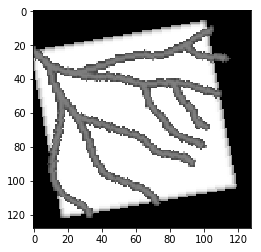

In [5]:
# original image
plt.imshow(img.squeeze(), cmap="gray")

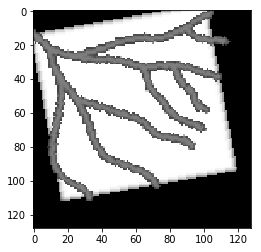

In [6]:
# translated image
plt.imshow(resampled_image_pytorch.squeeze().numpy(), cmap="gray")